#### 1. Import Necessary Packages and Data

In [1]:
# GENERAL
import pandas as pd                                    #Used to read data
import numpy as np                                     #Used to compute Root Mean Square Error
import matplotlib.pyplot as plt                        #Used to visualize data
import seaborn as sns                                  #Used to visualize data
from sklearn.model_selection import train_test_split   #Used to split the data into test and train sets 
from sklearn import metrics                            #Used to compute R^2, Mean Abs Error and Mean Square Error  
from sklearn.metrics import ConfusionMatrixDisplay     #Used to visualize data

# MODEL SPECIFIC
from sklearn.neighbors import KNeighborsClassifier      #Used to fit and predict a PLS Model 

# DATA
inputData = pd.read_excel(r'/Users/emilyknight/Documents/BMEN415 Final Project/CTG.xlsx').sample(frac = 1) #Import data

inputData.head() #Print complete dataset to console

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,NSP
2084,128,1,7,7,76,1.7,25,1.9,0,0,0,1
471,150,0,2,0,82,0.4,38,5.2,0,0,0,3
853,138,0,0,1,41,0.7,37,7.8,0,0,0,1
411,147,0,0,1,71,0.3,17,5.8,1,0,0,2
1790,121,0,1,1,61,2.0,0,4.9,9,0,0,3


#### 2. Select and Split Input and Output Vectors

In [2]:
# Select Input Vector, X, and Output Vector, y
X = inputData.drop(columns=['NSP']) #Input vector is all data but the Fetal State Class Code
y = inputData['NSP'] #Output data is the Fetal State Class Code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) #Split vectors, 20% will be used for testing 

#### 3. Instantiate and Fit Models

In [3]:
kNN = KNeighborsClassifier(n_neighbors=3) #kNN Model with 3 Neighbours

kNN.fit(X_train, y_train) #Fit the Model given the kNN Function

KNeighborsClassifier(n_neighbors=3)

#### 4. Score The Determination of the Prediction

In [4]:
kNN.score(X_test,y_test)

0.9295774647887324

#### 5. Test and Quantify Model Performance

In [5]:
kNN_predictions = kNN.predict(X_test) #Create predictions based on the kNN model with unseen test data 

#Compare the predictions to the known test values
print(metrics.confusion_matrix(y_test, kNN_predictions))

[[318   8   0]
 [ 17  44   0]
 [  4   1  34]]


#### 6. Visualize Data

Confusion matrix, without normalization
[[318   8   0]
 [ 17  44   0]
 [  4   1  34]]
Normalized confusion matrix
[[0.98 0.02 0.  ]
 [0.28 0.72 0.  ]
 [0.1  0.03 0.87]]


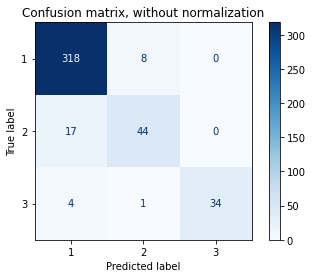

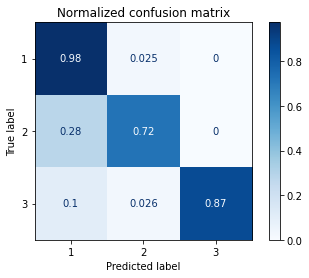

In [6]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(kNN,
                                                 X_test,
                                                 y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()